<a href="https://colab.research.google.com/github/goldenyasir/Notes/blob/main/Analysing_and_Visualising_Actual_Corona_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Data source is provided by https://data.humdata.org ](https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_confirmed_global.csv&filename=time_series_covid19_confirmed_global.csv)

# Analysing and Visualising Actual Corona Dataset

## Importing modules

In [200]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

import plotly.express as px
print('Modules are imported.')

Modules are imported.


## Importing covid19 dataset from url

In [201]:
url = "https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_confirmed_global.csv&filename=time_series_covid19_confirmed_global.csv"

df = pd.read_csv(url)

# To save data to csv file
df.to_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/time_series_covid19_confirmed_global.csv")

In [202]:
# Lest's check the shape of df
df.shape

(273, 382)

In [203]:
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,12/25/20,12/26/20,12/27/20,12/28/20,12/29/20,12/30/20,12/31/20,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,50810,50886,51039,51280,51350,51405,51526,51526,51526,51526,53011,53105,53105,53207,53332,53400,53489,53538,53584,53584,53775,53831,53938,53984,54062,54141,54278,54403,54483,54559,54595,54672,54750,54854,54891,54939,55008,55023,55059,55121
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,55380,55755,56254,56572,57146,57727,58316,58316,58991,59438,59623,60283,61008,61705,62378,63033,63595,63971,64627,65334,65994,66635,67216,67690,67982,68568,69238,69916,70655,71441,72274,72812,73691,74567,75454,76350,77251,78127,78992,79934
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,97441,97857,98249,98631,98988,99311,99610,99897,100159,100408,100645,100873,101120,101382,101657,101913,102144,102369,102641,102860,103127,103381,103611,103833,104092,104341,104606,104852,105124,105369,105596,105854,106097,106359,106610,106887,107122,107339,107578,107841
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,7756,7806,7821,7875,7919,7983,8049,8117,8166,8192,8249,8308,8348,8348,8489,8586,8586,8586,8682,8818,8868,8946,9038,9083,9083,9194,9308,9379,9416,9499,9549,9596,9638,9716,9779,9837,9885,9937,9972,10017
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,17099,17149,17240,17296,17371,17433,17553,17568,17608,17642,17684,17756,17864,17974,18066,18156,18193,18254,18343,18425,18613,18679,18765,18875,18926,19011,19093,19177,19269,19367,19399,19476,19553,19580,19672,19723,19782,19796,19829,19900


In [204]:
df.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,...,12/25/20,12/26/20,12/27/20,12/28/20,12/29/20,12/30/20,12/31/20,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21
count,272.000000,272.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,...,2.730000e+02,2.730000e+02,2.730000e+02,2.730000e+02,2.730000e+02,2.730000e+02,2.730000e+02,2.730000e+02,2.730000e+02,2.730000e+02,2.730000e+02,2.730000e+02,2.730000e+02,2.730000e+02,2.730000e+02,2.730000e+02,2.730000e+02,2.730000e+02,2.730000e+02,2.730000e+02,2.730000e+02,2.730000e+02,2.730000e+02,2.730000e+02,2.730000e+02,2.730000e+02,2.730000e+02,2.730000e+02,2.730000e+02,2.730000e+02,2.730000e+02,2.730000e+02,2.730000e+02,2.730000e+02,2.730000e+02,2.730000e+02,2.730000e+02,2.730000e+02,2.730000e+02,2.730000e+02
mean,20.639516,23.165585,2.040293,2.399267,3.446886,5.249084,7.758242,10.721612,20.432234,22.589744,30.164835,36.362637,44.095238,61.490842,72.846154,87.538462,101.256410,112.831502,125.992674,136.007326,147.106227,156.663004,164.142857,165.673993,221.179487,245.087912,252.937729,260.934066,268.388278,275.282051,277.113553,279.164835,281.468864,287.919414,289.311355,291.377289,294.501832,298.080586,303.062271,308.139194,...,2.927751e+05,2.946548e+05,2.962601e+05,2.980784e+05,3.005062e+05,3.032895e+05,3.059377e+05,3.078845e+05,3.101777e+05,3.121317e+05,3.141596e+05,3.168649e+05,3.197277e+05,3.228708e+05,3.258802e+05,3.286724e+05,3.308305e+05,3.330964e+05,3.356794e+05,3.384177e+05,3.411826e+05,3.439856e+05,3.462472e+05,3.482592e+05,3.501441e+05,3.523725e+05,3.549072e+05,3.573109e+05,3.597224e+05,3.618007e+05,3.634342e+05,3.652977e+05,3.673134e+05,3.694727e+05,3.716393e+05,3.738799e+05,3.757649e+05,3.771643e+05,3.788022e+05,3.804756e+05
std,25.181450,73.696719,26.928183,27.026232,33.646272,46.828263,65.442780,88.174227,216.374412,217.699503,300.001701,355.680061,437.683212,680.184951,822.250641,1013.386311,1194.199877,1342.439727,1514.391693,1644.405187,1797.481036,1924.323293,2023.436842,2023.775677,2919.944492,3294.720787,3406.217613,3523.133043,3632.411763,3734.796674,3755.931200,3780.771608,3794.149139,3880.108063,3880.148205,3892.498923,3922.720488,3947.162843,3972.463824,3992.676403,...,1.414705e+06,1.427149e+06,1.436216e+06,1.446263e+06,1.458494e+06,1.472570e+06,1.486197e+06,1.495536e+06,1.512272e+06,1.524065e+06,1.534813e+06,1.548938e+06,1.564295e+06,1.581216e+06,1.598014e+06,1.614109e+06,1.626559e+06,1.639037e+06,1.652922e+06,1.667094e+06,1.681619e+06,1.696507e+06,1.708867e+06,1.719631e+06,1.728482e+06,1.739778e+06,1.751641e+06,1.763820e+06,1.775856e+06,1.786727e+06,1.794873e+06,1.804149e+06,1.813808e+06,1.823894e+06,1.834790e+06,1.845646e+06,1.854925e+06,1.861923e+06,1.870227e+06,1.877964e+06
min,-51.796300,-178.116500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000

In [205]:
df.isna().sum()

Province/State    189
Country/Region      0
Lat                 1
Long                1
1/22/20             0
                 ... 
1/29/21             0
1/30/21             0
1/31/21             0
2/1/21              0
2/2/21              0
Length: 382, dtype: int64

In [206]:
# We can clearly see that many values in the columns are missing we will deal with them later
df.describe(include='all').T.sort_values(by='unique')

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Province/State,84,84,Anhui,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country/Region,273,192,China,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lat,272,NaN,NaN,NaN,20.6395,25.1815,-51.7963,6.10589,21.8051,41.123,71.7069
Long,272,NaN,NaN,NaN,23.1656,73.6967,-178.117,-20.0261,20.9727,84.4975,178.065
1/22/20,273,NaN,NaN,NaN,2.04029,26.9282,0,0,0,0,444
...,...,...,...,...,...,...,...,...,...,...,...
1/29/21,273,NaN,NaN,NaN,373880,1.84565e+06,0,899,11402,155678,2.59328e+07
1/30/21,273,NaN,NaN,NaN,375765,1.85492e+06,0,903,11460,156473,2.60749e+07
1/31/21,273,NaN,NaN,NaN,377164,1.86192e+06,0,903,11533,156957,2.61868e+07
2/1/21,273,NaN,NaN,NaN,378802,1.87023e+06,0,903,11533,157495,2.63211e+07


## Fixing country names and finding country codes

In [207]:
# First its better to find country_alpha3 and continent codes
!pip install pycountry_convert
import pycountry_convert as pc

In [208]:
# Let's define functions that gives us country codes and continent names
# country_to_continent() gives continent name of a country by the help of pycountry_convert library
def country_to_continent(country_name):
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    #country_alpha3 = pc.country_name_to_country_alpha3(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name

# add_alpha3(corona_df) gets the continent name and iso alpha3 country codes of a country 
# by the help of pycountry_convert library and add them to the df as seperate columns
def add_alpha3(corona_df):
  continent =[]
  alpha3 =[]
  for c in corona_df["Country/Region"]:
    try:
      continent.append(country_to_continent(c))
      alpha3.append(pc.country_name_to_country_alpha3(c)) 
    except:
      continent.append(np.nan)
      alpha3.append(np.nan)
      
  corona_df["Continent"] = continent
  corona_df["Alpha3"] = alpha3

In [209]:
add_alpha3(df)

In [210]:
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,12/27/20,12/28/20,12/29/20,12/30/20,12/31/20,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21,Continent,Alpha3
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,51039,51280,51350,51405,51526,51526,51526,51526,53011,53105,53105,53207,53332,53400,53489,53538,53584,53584,53775,53831,53938,53984,54062,54141,54278,54403,54483,54559,54595,54672,54750,54854,54891,54939,55008,55023,55059,55121,Asia,AFG
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,56254,56572,57146,57727,58316,58316,58991,59438,59623,60283,61008,61705,62378,63033,63595,63971,64627,65334,65994,66635,67216,67690,67982,68568,69238,69916,70655,71441,72274,72812,73691,74567,75454,76350,77251,78127,78992,79934,Europe,ALB
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,98249,98631,98988,99311,99610,99897,100159,100408,100645,100873,101120,101382,101657,101913,102144,102369,102641,102860,103127,103381,103611,103833,104092,104341,104606,104852,105124,105369,105596,105854,106097,106359,106610,106887,107122,107339,107578,107841,Africa,DZA
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,7821,7875,7919,7983,8049,8117,8166,8192,8249,8308,8348,8348,8489,8586,8586,8586,8682,8818,8868,8946,9038,9083,9083,9194,9308,9379,9416,9499,9549,9596,9638,9716,9779,9837,9885,9937,9972,10017,Europe,AND
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,17240,17296,17371,17433,17553,17568,17608,17642,17684,17756,17864,17974,18066,18156,18193,18254,18343,18425,18613,18679,18765,18875,18926,19011,19093,19177,19269,19367,19399,19476,19553,19580,19672,19723,19782,19796,19829,19900,Africa,AGO


In [211]:
# To see the new columns better, let's move the colums front
# move_column_inplace(df, col, pos) moves the wanted column to the desired place in the data frame.
def move_column_inplace(df, col, pos):
    col = df.pop(col)
    df.insert(pos, col.name, col)


move_column_inplace(df,"Continent",2)
move_column_inplace(df,"Alpha3",1)
df.head()

,Province/State,Alpha3,Country/Region,Continent,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,...,12/25/20,12/26/20,12/27/20,12/28/20,12/29/20,12/30/20,12/31/20,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21
0,NaN,AFG,Afghanistan,Asia,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,50810,50886,51039,51280,51350,51405,51526,51526,51526,51526,53011,53105,53105,53207,53332,53400,53489,53538,53584,53584,53775,53831,53938,53984,54062,54141,54278,54403,54483,54559,54595,54672,54750,54854,54891,54939,55008,55023,55059,55121
1,NaN,ALB,Albania,Europe,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,55380,55755,56254,56572,57146,57727,58316,58316,58991,59438,59623,60283,61008,61705,62378,63033,63595,63971,64627,65334,65994,66635,67216,67690,67982,68568,69238,69916,70655,71441,72274,72812,73691,74567,75454,76350,77251,78127,78992,79934
2,NaN,DZA,Algeria,Africa,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,97441,97857,98249,98631,98988,99311,99610,99897,100159,100408,100645,100873,101120,101382,101657,101913,102144,102369,102641,102860,103127,103381,103611,103833,104092,104341,104606,104852,105124,105369,105596,105854,106097,106359,106610,106887,107122,107339,107578,107841
3,NaN,AND,Andorra,Europe,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,7756,7806,7821,7875,7919,7983,8049,8117,8166,8192,8249,8308,8348,8348,8489,8586,8586,8586,8682,8818,8868,8946,9038,9083,9083,9194,9308,9379,9416,9499,9549,9596,9638,9716,9779,9837,9885,9937,9972,10017
4,NaN,AGO,Angola,Africa,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,17099,17149,17240,17296,17371,17433,17553,17568,17608,17642,17684,17756,17864,17974,18066,18156,18193,18254,18343,18425,18613,18679,18765,18875,18926,19011,19093,19177,19269,19367,19399,19476,19553,19580,19672,19723,19782,19796,19829,19900


In [212]:
# Let's find the total numbers of infected per country trough whole dataset to use it later
df["Total_Infected"] = df[df.columns[-1]]

move_column_inplace(df,"Total_Infected",4)
df.head()

,Province/State,Alpha3,Country/Region,Continent,Total_Infected,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,...,12/25/20,12/26/20,12/27/20,12/28/20,12/29/20,12/30/20,12/31/20,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21
0,NaN,AFG,Afghanistan,Asia,55121,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,50810,50886,51039,51280,51350,51405,51526,51526,51526,51526,53011,53105,53105,53207,53332,53400,53489,53538,53584,53584,53775,53831,53938,53984,54062,54141,54278,54403,54483,54559,54595,54672,54750,54854,54891,54939,55008,55023,55059,55121
1,NaN,ALB,Albania,Europe,79934,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,55380,55755,56254,56572,57146,57727,58316,58316,58991,59438,59623,60283,61008,61705,62378,63033,63595,63971,64627,65334,65994,66635,67216,67690,67982,68568,69238,69916,70655,71441,72274,72812,73691,74567,75454,76350,77251,78127,78992,79934
2,NaN,DZA,Algeria,Africa,107841,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,97441,97857,98249,98631,98988,99311,99610,99897,100159,100408,100645,100873,101120,101382,101657,101913,102144,102369,102641,102860,103127,103381,103611,103833,104092,104341,104606,104852,105124,105369,105596,105854,106097,106359,106610,106887,107122,107339,107578,107841
3,NaN,AND,Andorra,Europe,10017,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,7756,7806,7821,7875,7919,7983,8049,8117,8166,8192,8249,8308,8348,8348,8489,8586,8586,8586,8682,8818,8868,8946,9038,9083,9083,9194,9308,9379,9416,9499,9549,9596,9638,9716,9779,9837,9885,9937,9972,10017
4,NaN,AGO,Angola,Africa,19900,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,17099,17149,17240,17296,17371,17433,17553,17568,17608,17642,17684,17756,17864,17974,18066,18156,18193,18254,18343,18425,18613,18679,18765,18875,18926,19011,19093,19177,19269,19367,19399,19476,19553,19580,19672,19723,19782,19796,19829,19900


In [213]:
## Lets see if there are any null values present again
df.isna().sum().any()

True

In [214]:
df.isna().sum()

Province/State    189
Alpha3             13
Country/Region      0
Continent          13
Total_Infected      0
                 ... 
1/29/21             0
1/30/21             0
1/31/21             0
2/1/21              0
2/2/21              0
Length: 385, dtype: int64

In [215]:
# Let's see what is missing in "Province/State"
df[df["Province/State"].isna()]

# This means there is no seperated data for these countries among provinces. 
# So let's fill them with country names
#df["Province/State"].fillna(df["Country/Region"]) 
df['Province/State'] = np.where(df['Province/State'].isnull(), df['Country/Region'], df['Province/State'])

In [216]:
# Let's see what is missing in
df[df["Alpha3"].isna()]

,Province/State,Alpha3,Country/Region,Continent,Total_Infected,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,...,12/25/20,12/26/20,12/27/20,12/28/20,12/29/20,12/30/20,12/31/20,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21
34,Burma,NaN,Burma,NaN,140354,21.916200,95.956000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,120546,121280,121886,122534,123153,123740,124630,125042,125616,126345,126935,127584,128178,128772,129483,130049,130604,131186,131737,132260,132865,133378,133869,134318,134795,135243,135721,136166,136591,137098,137574,137957,138368,138802,139152,139515,139864,140145,140354,140354
93,Congo (Brazzaville),NaN,Congo (Brazzaville),NaN,7887,-0.228000,15.827700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6571,6908,6908,6908,6908,6908,7107,7107,7107,7107,7107,7107,7127,7127,7127,7127,7127,7127,7160,7160,7160,7709,7709,7709,7709,7709,7709,7794,7794,7794,7794,7887,7887,7887,7887,7887,7887,7887,7887,7887
94,Congo (Kinshasa),NaN,Congo (Kinshasa),NaN,23043,-4.038300,21.758700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,16472,16763,16839,16917,17182,17376,17658,17849,17998,18102,18153,18248,18487,18738,18969,19159,19436,19496,19707,20003,20479,20556,20693,20908,21060,21140,21302,21398,21597,21713,21869,21954,22048,22178,22322,22455,22604,22771,22842,23043
96,Cote d'Ivoire,NaN,Cote d'Ivoire,NaN,28607,7.540000,-5.547100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,22081,22081,22152,22176,22250,22366,22490,22563,22563,22648,22800,22855,22963,23173,23254,23482,23750,23894,24186,24369,24578,24856,24856,25241,25304,25383,25597,25751,26315,26612,26850,27096,27237,27455,27694,27934,28178,28399,28475,28607
104,Diamond Princess,NaN,Diamond Princess,NaN,712,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,61,61,64,135,135,175,175,218,285,355,454,542,621,634,634,634,691,...,712,712,712,712,712,712,712,712,712,712,712,712,712,712,712,712,712,712,712,712,712,712,712,712,712,712,712,712,712,712,712,712,712,712,712,712,712,712,712,712
142,Holy See,NaN,Holy See,NaN,27,41.902900,12.453400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27
158,"Korea, South",NaN,"Korea, South",NaN,79311,35.907757,127.766922,1,1,2,2,3,4,4,4,4,11,12,15,15,16,19,23,24,24,25,27,28,28,28,28,28,29,30,31,31,104,204,433,602,...,55902,56872,57680,58725,59773,60740,61769,62593,63244,64264,64979,65818,66686,67358,67999,68664,69114,69651,70212,70728,71241,71820,72340,72729,73115,73518,73918,74262,74692,75084,75521,75875,76429,76926,77395,77850,78205,78508,78844,79311
159,Kosovo,NaN,Kosovo,NaN,60218,42.602636,20.902977,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,50135,50405,50620,50801,50910,50910,51144,51502,51502,51965,51965,52333,52333,52943,53264,53264,53776,53982,54261,54560,54839,55135,55135,55851,55851,56118,56412,57028,57317,57317,57317,58399,58399,58988,58988,59646,59646,60218,60218,60218
171,MS Zaandam,NaN,MS Zaandam,NaN,9,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
240,Taiwan*,NaN,Taiwan*,NaN,915,23.700000,121.000000,1,1,3,3,4,5,8,8,9,10,10,10,10,11,11,16,16,17,18,18,18,18,18,18,18,20,22,22,23,24,26,26,28,...,780,783,785,793,795,797,799,802,808,812,815,817,819,822,825,828,828,834,838,842,842,843,851,855,862,868,870,881,881,884,889,889,890,893,895,899,909,911,912,915


In [217]:
# These country names don't match with pycountry_convert library
# So let's fix them
df.loc[df["Continent"].isna()]["Country/Region"].to_list()

['Burma',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 "Cote d'Ivoire",
 'Diamond Princess',
 'Holy See',
 'Korea, South',
 'Kosovo',
 'MS Zaandam',
 'Taiwan*',
 'Timor-Leste',
 'US',
 'West Bank and Gaza']

In [218]:
# Let's find country names that are used in the pycountry library
#loop over all of the countries contained in the pycountry library and populate dictionary
import pycountry
for country in pycountry.countries:
    print(country.name)

Aruba
Afghanistan
Angola
Anguilla
Åland Islands
Albania
Andorra
United Arab Emirates
Argentina
Armenia
American Samoa
Antarctica
French Southern Territories
Antigua and Barbuda
Australia
Austria
Azerbaijan
Burundi
Belgium
Benin
Bonaire, Sint Eustatius and Saba
Burkina Faso
Bangladesh
Bulgaria
Bahrain
Bahamas
Bosnia and Herzegovina
Saint Barthélemy
Belarus
Belize
Bermuda
Bolivia, Plurinational State of
Brazil
Barbados
Brunei Darussalam
Bhutan
Bouvet Island
Botswana
Central African Republic
Canada
Cocos (Keeling) Islands
Switzerland
Chile
China
Côte d'Ivoire
Cameroon
Congo, The Democratic Republic of the
Congo
Cook Islands
Colombia
Comoros
Cabo Verde
Costa Rica
Cuba
Curaçao
Christmas Island
Cayman Islands
Cyprus
Czechia
Germany
Djibouti
Dominica
Denmark
Dominican Republic
Algeria
Ecuador
Egypt
Eritrea
Western Sahara
Spain
Estonia
Ethiopia
Finland
Fiji
Falkland Islands (Malvinas)
France
Faroe Islands
Micronesia, Federated States of
Gabon
United Kingdom
Georgia
Guernsey
Ghana
Gibraltar
Gui

In [219]:
#Lets correct country names manually to match pycountry library
def change_country_name(corona_df,old,new):
  corona_df.loc[(corona_df["Country/Region"] == old),"Country/Region"]=new
  print(old+"--->"+new)

def change_country_names(corona_df,li):
  for idx, elem in enumerate(li):
    if (idx%2 == 1):
      continue
    old = elem
    new = li[(idx + 1) % len(li)]
    
    try:
      corona_df.loc[(corona_df["Country/Region"] == old),"Country/Region"]=new
      print(old+"--->"+new)
    except:
      print(old+"---> Failed to change name...")

#change_country_name("US","United States")

oldNewCountryNames=[
  "Congo (Brazzaville)","Congo"
 ,"Congo (Kinshasa)","Congo, The Democratic Republic of the"
 ,"Cote d'Ivoire","Côte d'Ivoire"
# 'Diamond Princess', Cruiseship
 ,"Holy See","Holy See (Vatican City State)"
 ,"Korea, South","Korea, Republic of"
 ,"Taiwan*","Taiwan, Province of China"
 ,"US","United States"
 ,"Timor-Leste","Timor-Leste" 
# 'West Bank and Gaza'
# 'Kosovo',
 ,"Burma","Myanmar"
# 'MS Zaandam',
# 'Western Sahara'
 ]

change_country_names(df,oldNewCountryNames)

Congo (Brazzaville)--->Congo
Congo (Kinshasa)--->Congo, The Democratic Republic of the
Cote d'Ivoire--->Côte d'Ivoire
Holy See--->Holy See (Vatican City State)
Korea, South--->Korea, Republic of
Taiwan*--->Taiwan, Province of China
US--->United States
Timor-Leste--->Timor-Leste
Burma--->Myanmar


In [220]:
# Let's try to find Alpha3 codes again
add_alpha3(df)

In [221]:
df.isna().sum()

Province/State    0
Alpha3            6
Country/Region    0
Continent         6
Total_Infected    0
                 ..
1/29/21           0
1/30/21           0
1/31/21           0
2/1/21            0
2/2/21            0
Length: 385, dtype: int64

In [222]:
df.loc[df["Alpha3"].isna()]["Country/Region"].to_list()

['Diamond Princess',
 'Holy See (Vatican City State)',
 'Kosovo',
 'MS Zaandam',
 'Timor-Leste',
 'West Bank and Gaza']

In [223]:
# The rest are not countries or don't belong to pycountry library. 
# So delete them from df
df.loc[df["Alpha3"].isna()]["Country/Region"].index

Int64Index([104, 142, 159, 171, 244, 269], dtype='int64')

In [224]:
df.drop(df.loc[df["Alpha3"].isna()]["Country/Region"].index, inplace=True)

In [225]:
df.shape

(267, 385)

In [226]:
df[df["Country/Region"] == "China"]

,Province/State,Alpha3,Country/Region,Continent,Total_Infected,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,...,12/25/20,12/26/20,12/27/20,12/28/20,12/29/20,12/30/20,12/31/20,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21
58,Anhui,CHN,China,Asia,994,31.8257,117.2264,1,9,15,39,60,70,106,152,200,237,297,340,408,480,530,591,665,733,779,830,860,889,910,934,950,962,973,982,986,987,988,989,989,...,992,993,993,993,993,993,993,993,993,993,993,993,993,993,993,993,993,993,993,993,993,993,993,993,993,993,993,994,994,994,994,994,994,994,994,994,994,994,994,994
59,Beijing,CHN,China,Asia,1039,40.1824,116.4142,14,22,36,41,68,80,91,111,114,139,168,191,212,228,253,274,297,315,326,337,342,352,366,372,375,380,381,387,393,395,396,399,399,...,963,971,972,979,980,982,987,988,990,992,993,994,994,995,995,996,997,998,998,999,999,1001,1003,1006,1007,1014,1017,1020,1023,1025,1028,1030,1034,1034,1035,1036,1036,1038,1039,1039
60,Chongqing,CHN,China,Asia,591,30.0572,107.8740,6,9,27,57,75,110,132,147,182,211,247,300,337,366,389,411,426,428,468,486,505,518,529,537,544,551,553,555,560,567,572,573,575,...,590,590,590,590,590,590,590,590,590,590,590,590,590,590,590,590,590,590,590,590,590,591,591,591,591,591,591,591,591,591,591,591,591,591,591,591,591,591,591,591
61,Fujian,CHN,China,Asia,541,26.0789,117.9874,1,5,10,18,35,59,80,84,101,120,144,159,179,194,205,215,224,239,250,261,267,272,279,281,285,287,290,292,293,293,293,293,293,...,508,508,508,509,511,512,513,513,516,517,518,518,518,519,520,526,527,528,529,529,529,529,531,532,532,533,533,534,534,534,535,536,536,536,536,539,541,541,541,541
62,Gansu,CHN,China,Asia,187,35.7518,104.2861,0,2,2,4,7,14,19,24,26,29,40,51,55,57,62,62,67,79,83,83,86,87,90,90,90,90,91,91,91,91,91,91,91,...,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,183,183,183,187,187,187,187,187,187,187,187
63,Guangdong,CHN,China,Asia,2129,23.3417,113.4244,26,32,53,78,111,151,207,277,354,436,535,632,725,813,895,970,1034,1095,1131,1159,1177,1219,1241,1261,1294,1316,1322,1328,1331,1332,1333,1339,1342,...,2038,2038,2039,2040,2041,2044,2046,2046,2051,2053,2057,2060,2062,2065,2067,2068,2075,2076,2078,2081,2084,2084,2086,2087,2090,2093,2094,2098,2099,2104,2106,2108,2115,2116,2121,2121,2124,2125,2127,2129
64,Guangxi,CHN,China,Asia,267,23.8298,108.7881,2,5,23,23,36,46,51,58,78,87,100,111,127,139,150,168,172,183,195,210,215,222,222,226,235,237,238,242,244,245,246,249,249,...,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,265,266,266,266,266,266,266,267,267,267,267,267,267,267,267,267,267,267,267,267,267
65,Guizhou,CHN,China,Asia,147,26.8154,106.8748,1,3,3,4,5,7,9,9,12,29,29,38,46,58,64,71,81,89,99,109,127,133,135,140,143,144,146,146,146,146,146,146,146,...,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147
66,Hainan,CHN,China,Asia,171,19.1959,109.7453,4,5,8,19,22,33,40,43,46,52,62,64,72,80,99,106,117,124,131,138,144,157,157,159,162,162,163,163,168,168,168,168,168,...,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171
67,Hebei,CHN,China,Asia,1314,39.5490,116.1306,1,1,2,8,13,18,33,48,65,82,96,104,113,126,135,157,172,195,206,218,239,251,265,283,291,300,301,306,306,307,308,309,311,...,373,373,373,373,373,373,373,373,374,378,392,412,465,498,512,558,640,680,770,851,941,1031,1103,1157,1192,1211,1231,1252,1264,1283,1294,1299,1306,1309,1310,

## Worldmap of Total Infections

In [227]:
fig = px.scatter_geo(df, 
                     lat="Lat", lon="Long",
                     #locations="Province/State", #"Alpha3",
                     color="Continent", # which column to use to set the color of markers
                     hover_name="Province/State", # column added to hover information
                     size="Total_Infected", # size of markers
                     projection="natural earth",
                     title="Worldmap of Total Infections"
                     )
fig.show()

## Infection Rate by Country

In [228]:
# Aggregate data by country with daily sums
# Latitude and Longtitude will be useless
dfC = df.drop(["Lat","Long"], axis=1)

In [229]:
dfC.head()

,Province/State,Alpha3,Country/Region,Continent,Total_Infected,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,...,12/25/20,12/26/20,12/27/20,12/28/20,12/29/20,12/30/20,12/31/20,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21
0,Afghanistan,AFG,Afghanistan,Asia,55121,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,50810,50886,51039,51280,51350,51405,51526,51526,51526,51526,53011,53105,53105,53207,53332,53400,53489,53538,53584,53584,53775,53831,53938,53984,54062,54141,54278,54403,54483,54559,54595,54672,54750,54854,54891,54939,55008,55023,55059,55121
1,Albania,ALB,Albania,Europe,79934,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,55380,55755,56254,56572,57146,57727,58316,58316,58991,59438,59623,60283,61008,61705,62378,63033,63595,63971,64627,65334,65994,66635,67216,67690,67982,68568,69238,69916,70655,71441,72274,72812,73691,74567,75454,76350,77251,78127,78992,79934
2,Algeria,DZA,Algeria,Africa,107841,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,97441,97857,98249,98631,98988,99311,99610,99897,100159,100408,100645,100873,101120,101382,101657,101913,102144,102369,102641,102860,103127,103381,103611,103833,104092,104341,104606,104852,105124,105369,105596,105854,106097,106359,106610,106887,107122,107339,107578,107841
3,Andorra,AND,Andorra,Europe,10017,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,7756,7806,7821,7875,7919,7983,8049,8117,8166,8192,8249,8308,8348,8348,8489,8586,8586,8586,8682,8818,8868,8946,9038,9083,9083,9194,9308,9379,9416,9499,9549,9596,9638,9716,9779,9837,9885,9937,9972,10017
4,Angola,AGO,Angola,Africa,19900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,17099,17149,17240,17296,17371,17433,17553,17568,17608,17642,17684,17756,17864,17974,18066,18156,18193,18254,18343,18425,18613,18679,18765,18875,18926,19011,19093,19177,19269,19367,19399,19476,19553,19580,19672,19723,19782,19796,19829,19900


In [230]:
dfC.loc[dfC.Alpha3 == "CHN"]

,Province/State,Alpha3,Country/Region,Continent,Total_Infected,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,...,12/25/20,12/26/20,12/27/20,12/28/20,12/29/20,12/30/20,12/31/20,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21
58,Anhui,CHN,China,Asia,994,1,9,15,39,60,70,106,152,200,237,297,340,408,480,530,591,665,733,779,830,860,889,910,934,950,962,973,982,986,987,988,989,989,989,989,...,992,993,993,993,993,993,993,993,993,993,993,993,993,993,993,993,993,993,993,993,993,993,993,993,993,993,993,994,994,994,994,994,994,994,994,994,994,994,994,994
59,Beijing,CHN,China,Asia,1039,14,22,36,41,68,80,91,111,114,139,168,191,212,228,253,274,297,315,326,337,342,352,366,372,375,380,381,387,393,395,396,399,399,399,400,...,963,971,972,979,980,982,987,988,990,992,993,994,994,995,995,996,997,998,998,999,999,1001,1003,1006,1007,1014,1017,1020,1023,1025,1028,1030,1034,1034,1035,1036,1036,1038,1039,1039
60,Chongqing,CHN,China,Asia,591,6,9,27,57,75,110,132,147,182,211,247,300,337,366,389,411,426,428,468,486,505,518,529,537,544,551,553,555,560,567,572,573,575,576,576,...,590,590,590,590,590,590,590,590,590,590,590,590,590,590,590,590,590,590,590,590,590,591,591,591,591,591,591,591,591,591,591,591,591,591,591,591,591,591,591,591
61,Fujian,CHN,China,Asia,541,1,5,10,18,35,59,80,84,101,120,144,159,179,194,205,215,224,239,250,261,267,272,279,281,285,287,290,292,293,293,293,293,293,293,294,...,508,508,508,509,511,512,513,513,516,517,518,518,518,519,520,526,527,528,529,529,529,529,531,532,532,533,533,534,534,534,535,536,536,536,536,539,541,541,541,541
62,Gansu,CHN,China,Asia,187,0,2,2,4,7,14,19,24,26,29,40,51,55,57,62,62,67,79,83,83,86,87,90,90,90,90,91,91,91,91,91,91,91,91,91,...,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,183,183,183,187,187,187,187,187,187,187,187
63,Guangdong,CHN,China,Asia,2129,26,32,53,78,111,151,207,277,354,436,535,632,725,813,895,970,1034,1095,1131,1159,1177,1219,1241,1261,1294,1316,1322,1328,1331,1332,1333,1339,1342,1345,1347,...,2038,2038,2039,2040,2041,2044,2046,2046,2051,2053,2057,2060,2062,2065,2067,2068,2075,2076,2078,2081,2084,2084,2086,2087,2090,2093,2094,2098,2099,2104,2106,2108,2115,2116,2121,2121,2124,2125,2127,2129
64,Guangxi,CHN,China,Asia,267,2,5,23,23,36,46,51,58,78,87,100,111,127,139,150,168,172,183,195,210,215,222,222,226,235,237,238,242,244,245,246,249,249,251,252,...,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,265,266,266,266,266,266,266,267,267,267,267,267,267,267,267,267,267,267,267,267,267
65,Guizhou,CHN,China,Asia,147,1,3,3,4,5,7,9,9,12,29,29,38,46,58,64,71,81,89,99,109,127,133,135,140,143,144,146,146,146,146,146,146,146,146,146,...,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147
66,Hainan,CHN,China,Asia,171,4,5,8,19,22,33,40,43,46,52,62,64,72,80,99,106,117,124,131,138,144,157,157,159,162,162,163,163,168,168,168,168,168,168,168,...,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171
67,Hebei,CHN,China,Asia,1314,1,1,2,8,13,18,33,48,65,82,96,104,113,126,135,157,172,195,206,218,239,251,265,283,291,300,301,306,306,307,308,309,311,311,311,...,373,373,373,373,373,373,373,373,374,378,392,412,465,498,512,558,640,680,770,851,941,1031,1103,1157,1192,1211,1231,1252,1264,1283,1294,1299,1306,1309,1310,1311,1312,1313,1313,1314


In [231]:
dfC = dfC.groupby("Alpha3").sum()

In [232]:
dfC.head()

,Total_Infected,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,...,12/25/20,12/26/20,12/27/20,12/28/20,12/29/20,12/30/20,12/31/20,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21
Alpha3,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AFG,55121,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,50810,50886,51039,51280,51350,51405,51526,51526,51526,51526,53011,53105,53105,53207,53332,53400,53489,53538,53584,53584,53775,53831,53938,53984,54062,54141,54278,54403,54483,54559,54595,54672,54750,54854,54891,54939,55008,55023,55059,55121
AGO,19900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,17099,17149,17240,17296,17371,17433,17553,17568,17608,17642,17684,17756,17864,17974,18066,18156,18193,18254,18343,18425,18613,18679,18765,18875,18926,19011,19093,19177,19269,19367,19399,19476,19553,19580,19672,19723,19782,19796,19829,19900
ALB,79934,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,55380,55755,56254,56572,57146,57727,58316,58316,58991,59438,59623,60283,61008,61705,62378,63033,63595,63971,64627,65334,65994,66635,67216,67690,67982,68568,69238,69916,70655,71441,72274,72812,73691,74567,75454,76350,77251,78127,78992,79934
AND,10017,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,7756,7806,7821,7875,7919,7983,8049,8117,8166,8192,8249,8308,8348,8348,8489,8586,8586,8586,8682,8818,8868,8946,9038,9083,9083,9194,9308,9379,9416,9499,9549,9596,9638,9716,9779,9837,9885,9937,9972,10017
ARE,309649,0,0,0,0,0,0,0,4,4,4,4,5,5,5,5,5,5,7,7,8,8,8,8,8,8,9,9,9,9,9,9,13,13,13,13,13,13,19,21,...,199665,200892,201836,202863,204369,206092,207822,209678,211641,213231,214732,216699,218766,221754,224704,227702,230578,232982,236225,239587,242969,246376,249808,253261,256732,260223,263729,267258,270810,274376,277955,281546,285147,289086,293052,297014,300661,303609,306339,309649


In [233]:
dfC[dfC.index=='CHN']

,Total_Infected,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,...,12/25/20,12/26/20,12/27/20,12/28/20,12/29/20,12/30/20,12/31/20,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21
Alpha3,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CHN,100177,548,643,920,1406,2075,2877,5509,6087,8141,9802,11891,16630,19716,23707,27440,30587,34110,36814,39829,42354,44386,44759,59895,66358,68413,70513,72434,74211,74619,75077,75550,77001,77022,77241,77754,78166,78600,78928,79356,...,95460,95541,95632,95720,95797,95876,95963,96023,96086,96160,96246,96310,96398,96484,96562,96690,96824,96920,97095,97275,97448,97616,97775,97939,98164,98323,98544,98786,98886,99047,99247,99402,99541,99655,99746,99848,99968,100063,100127,100177


In [234]:
dfC.loc["CHN"]

Total_Infected    100177
1/22/20              548
1/23/20              643
1/24/20              920
1/25/20             1406
                   ...  
1/29/21            99848
1/30/21            99968
1/31/21           100063
2/1/21            100127
2/2/21            100177
Name: CHN, Length: 379, dtype: int64

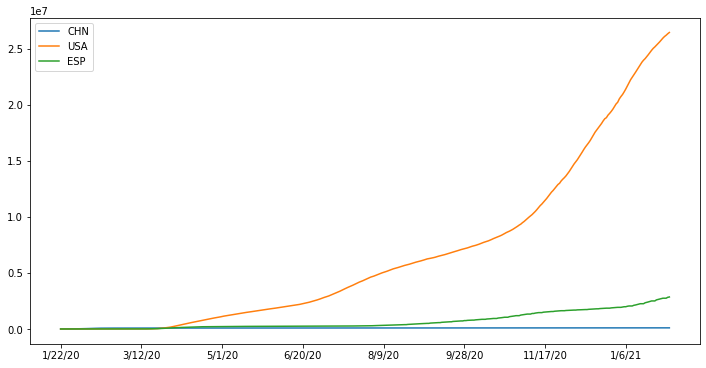

In [235]:
# Visualize data related to a country for example China, United states and Spain
plt.figure(figsize=(12,6))
dfC.loc["CHN"][1:].plot()
dfC.loc["USA"][1:].plot()
dfC.loc["ESP"][1:].plot()
plt.legend()

Text(0, 0.5, 'Number of infections')

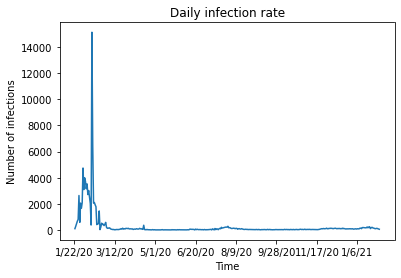

In [236]:
# To find daily infection rate, we can use .diff()
dfC.loc["CHN"][1:].diff().plot()
plt.title('Daily infection rate')
plt.xlabel("Time")
plt.ylabel("Number of infections")

In [237]:
# To add daily infection rates to df 
dfC.reset_index(inplace=True)
dfCD = dfC.melt(id_vars=["Alpha3","Total_Infected"], var_name= "Date", value_name="Infected") 
dfCD.head()

,Alpha3,Total_Infected,Date,Infected
0,AFG,55121,1/22/20,0
1,AGO,19900,1/22/20,0
2,ALB,79934,1/22/20,0
3,AND,10017,1/22/20,0
4,ARE,309649,1/22/20,0


In [238]:
dfCD.shape

(70308, 4)

In [239]:
# To calculate infection rate for each country 
cs = dfCD.Alpha3.unique() # List of country codes
for c in cs:
  dfCD.loc[dfCD.Alpha3 == c, "Inf_Rate"] = dfCD.loc[dfCD.Alpha3 == c]["Infected"].diff()

dfCD.head()

,Alpha3,Total_Infected,Date,Infected,Inf_Rate
0,AFG,55121,1/22/20,0,NaN
1,AGO,19900,1/22/20,0,NaN
2,ALB,79934,1/22/20,0,NaN
3,AND,10017,1/22/20,0,NaN
4,ARE,309649,1/22/20,0,NaN


In [240]:
# Change NaN values by zero
dfCD.Inf_Rate = dfCD.Inf_Rate.fillna(0)
dfCD.head(2)

,Alpha3,Total_Infected,Date,Infected,Inf_Rate
0,AFG,55121,1/22/20,0,0.0
1,AGO,19900,1/22/20,0,0.0


In [241]:
# Let's add country and continent names again
continent=[]
country =[]
for alphacode in dfCD.Alpha3:
  c = pc.map_country_alpha3_to_country_name()[alphacode]
  country.append(c)
  continent.append(country_to_continent(c))
dfCD["Country"]=country
dfCD["Continent"]=continent
dfCD.head()

,Alpha3,Total_Infected,Date,Infected,Inf_Rate,Country,Continent
0,AFG,55121,1/22/20,0,0.0,Afghanistan,Asia
1,AGO,19900,1/22/20,0,0.0,Angola,Africa
2,ALB,79934,1/22/20,0,0.0,Albania,Europe
3,AND,10017,1/22/20,0,0.0,Andorra,Europe
4,ARE,309649,1/22/20,0,0.0,United Arab Emirates,Asia


In [242]:
dfCD.Inf_Rate.describe()

count     70308.000000
mean       1474.203106
std        9276.439375
min      -46076.000000
25%           0.000000
50%          21.000000
75%         363.000000
max      823225.000000
Name: Inf_Rate, dtype: float64

In [243]:
# max and min values are too much and not logical
dfCD.loc[dfCD.Inf_Rate == dfCD.Inf_Rate.max()]

,Alpha3,Total_Infected,Date,Infected,Inf_Rate,Country,Continent
60247,TUR,2492977,12/10/20,1748567,823225.0,Turkey,Asia


In [244]:
dfCD.loc[dfCD.Inf_Rate == dfCD.Inf_Rate.min()]

,Alpha3,Total_Infected,Date,Infected,Inf_Rate,Country,Continent
53440,FRA,3283645,11/4/20,1593159,-46076.0,France,Europe


In [245]:
# Convert date column to pandas datetime
dfCD.Date = pd.to_datetime(dfCD.Date)
dfCD.Date = dfCD.Date.dt.strftime('%Y-%m-%d')

In [246]:
# min value is ok, but max value is weird that is from Turkey
#Let's look deeper
start_date = '2020-12-08'
end_date = '2020-12-15'
mask = (dfCD.Alpha3 == "TUR") & (dfCD['Date'] > start_date) & (dfCD['Date'] <= end_date)
dfCD.loc[mask]

# Here Red color indicates the maximum number of data entries
dfCD.loc[mask].style.background_gradient(cmap='Reds')

,Alpha3,Total_Infected,Date,Infected,Inf_Rate,Country,Continent
60061,TUR,2492977,2020-12-09,925342,31712.000000,Turkey,Asia
60247,TUR,2492977,2020-12-10,1748567,823225.000000,Turkey,Asia
60433,TUR,2492977,2020-12-11,1780673,32106.000000,Turkey,Asia
60619,TUR,2492977,2020-12-12,1809809,29136.000000,Turkey,Asia
60805,TUR,2492977,2020-12-13,1836728,26919.000000,Turkey,Asia
60991,TUR,2492977,2020-12-14,1866345,29617.000000,Turkey,Asia
61177,TUR,2492977,2020-12-15,1898447,32102.000000,Turkey,Asia


In [247]:
# We have Outliers in the data, 
#so let's use the average of top 10 values to set max amd min values for graph
cmax=int(dfCD.Inf_Rate.nlargest(10).mean())
cmin=int(dfCD.Inf_Rate.nsmallest(10).mean())

In [248]:
# Because of axis width, we can use smaller values
cmax=30000
cmin=-10000

## Timeframe animation of the people daily infected region wise

In [249]:
fig = px.choropleth(dfCD,locations='Alpha3',hover_name='Country',color='Inf_Rate',animation_frame='Date',
                    projection='natural earth',range_color=[cmin,cmax],
                    color_continuous_scale='Reds',
                    title="Daily Infection Rate"
                   ) 
fig.show()

## Further study
* Find population data of countries and use infected/population ratio.
* Compare max and min infection rates between countries.
*